<a href="https://colab.research.google.com/github/mssabahi/Machine_Learning/blob/master/ch_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality reduction: feature extraction

When dealing with high dimensional data, it is often useful to reduce the dimensionality by projecting the data to a lower dimensional subspace which captures the “essence” of the data. This is called dimensionality reduction.

# Unsupervised learning methods
* Principal component analysis (PCA) 
* Singular value decomposition (SVD)
* Clustering/grouping 
*  Exploratory data mining

# Dimensionality reduction methods
* PCA
* SVD

# PCA
* Relationship between X and y
* Calculated by finnding principal axes
* Translates, rotates and scales
* Lower-dimensional projection of the data

# SVD

Singular Value Decomposition, or SVD, might be the most popular technique for dimensionality reduction when data is sparse. Sparse data refers to rows of data where many of the values are zero. This is often the case in some problem domains like recommender systems where a user has a rating for very few movies or songs in the database and zero ratings for all other cases. Another common example is a bag of words model of a text document, where the document has a count or frequency for some words and most words have a 0 value.

**Examples of sparse data appropriate for applying SVD for dimensionality reduction**:

* Recommender Systems
* Customer-Product purchases
* User-Song Listen Counts
* User-Movie Ratings
* Text Classification
* One Hot Encoding
* Bag of Words Counts
* TF/IDF

# SVD Steps:
* Linear algebra and vector calculus
* Decomposes data matrix into three
matrices
* Results in 'singular' values
* Variance in data approximately equals  sum of squares (SS) of singular values


# Dimensionality Reduction Functions


```
sklearn.decomposition.PCA              principal component analysis
sklearn.decomposition.TruncatedSVD     singular value decomposition
PCA/SVD.fit_transform(X)               fits and transforms data
PCA/SVD.explained_variance_ratio_      variance explained by PCs```




# Principal component analysis
We can reduce the dimensionality of our dataset using regularization and feature selection. It is important to be able to explain different aspects of reducing dimensionality. Large datasets take a long time to compute, and noise in your data can bias your results.

One way of reducing dimensionality is principal component analysis. It's an effective way of reducing the size of the data by creating new features that preserve the most useful information on a dataset while at the same time removing multicollinearity. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/ML_Interview/Chapter_03/diabetes.csv')
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
# Import module
from sklearn.decomposition import PCA

# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# PCA
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


# Singular value decomposition

In this exercise, we will practice SVD on the diabetes. This particular transformer can work with sparse matrices efficiently, as opposed to PCA, and performs linear dimensionality reductions by way of truncated singular value decomposition.

In [ ]:
# Import module
from sklearn.decomposition import TruncatedSVD
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

In [ ]:
# Instantiate a singular value decomposition object to perform dimensionality reduction that returns 3 components.

# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


# Visualization separation of classes with PCA 
In this exercise, you will do just that by plotting the first 2 principal components of loan_data in order to visualize the class separation between both components on whether the loan status has been fully paid or charged off.

The loan_data dataset has been scaled and one-hot encoded, meaning categorical variables were turned into binary indicators, since **features should be on the same scale as well as numeric prior to PCA.**

A PCA model with 2 PCs and setting up a plot with x and y labels and title has already been taken care of for you. You'll use a DataFrame called loan_data_PCA in the exercises. The possible values for the target variable Loan Status are 0 and 1. You'll be plotting PC1 on the x-axis and PC2 on the y-axis.

In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/ML_Interview/Chapter_03/LoansTrainingSetReduced.csv')
loan_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,728.0,1.0,Rent,46643.0,DebtConsolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,Charged Off,25014,Long Term,733.0,10.0,Mortgage,81099.0,DebtConsolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,Charged Off,16117,Short Term,724.0,9.0,Mortgage,60438.0,HomeImprovements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,Charged Off,11716,Short Term,740.0,3.0,Rent,34171.0,DebtConsolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,Charged Off,9789,Long Term,686.0,10.0,Mortgage,47003.0,HomeImprovements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   88910 non-null  object 
 1   Current Loan Amount           88910 non-null  int64  
 2   Term                          88910 non-null  object 
 3   Credit Score                  67572 non-null  float64
 4   Years in current job          88910 non-null  float64
 5   Home Ownership                88910 non-null  object 
 6   Annual Income                 67572 non-null  float64
 7   Purpose                       88910 non-null  object 
 8   Monthly Debt                  88910 non-null  float64
 9   Years of Credit History       88910 non-null  float64
 10  Months since last delinquent  40404 non-null  float64
 11  Number of Open Accounts       88910 non-null  int64  
 12  Number of Credit Problems     88910 non-null  int64  
 13  C

# Iterative Imputation

In [ ]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# Now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_iterDF = pd.DataFrame(loans_imp_iter, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_iterDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

In [ ]:
# Replace loan_data columns with loans_imp_iter
for i in loans_imp_iterDF.columns:
  loan_data[i] = loans_imp_iterDF[i]

In [ ]:
loan_data_ref = loan_data.copy()

In [ ]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

numeric_cols = loan_data.select_dtypes(include=[np.number])


# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)

numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

In [ ]:
numeric_cols_scaledDF.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,-0.408982,0.240814,-1.312259,-0.438916,-0.291304,-0.044731,-1.152079,0.178701,-0.338742,-0.441228,-0.097522,-0.327988,-0.109594
1,-0.408617,0.423259,1.189261,0.151752,-0.111388,1.189463,-0.033433,0.580434,-0.338742,1.031104,0.168967,-0.327988,-0.109594
2,-0.408871,0.094859,0.911314,-0.202432,0.440641,-0.229151,-0.157990,-0.022165,1.772105,-0.211660,-0.071377,2.586801,-0.109594
3,-0.408997,0.678681,-0.756366,-0.652719,0.043666,-1.179622,-0.497816,1.986499,-0.338742,-0.428664,0.037928,-0.327988,-0.109594
4,-0.409052,-1.291720,1.189261,-0.432744,-0.720592,-0.229151,-0.474291,0.379568,1.772105,0.075136,-0.053344,2.586801,-0.109594


In [ ]:
loan_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232.0,Short Term,728.0,1.0,Rent,46643.0,DebtConsolidation,777.39,18.0,10.000000,12.0,0.0,6762.0,7946.0,0.0,0.0
1,Charged Off,25014.0,Long Term,733.0,10.0,Mortgage,81099.0,DebtConsolidation,892.09,26.7,34.756537,14.0,0.0,35706.0,77961.0,0.0,0.0
2,Charged Off,16117.0,Short Term,724.0,9.0,Mortgage,60438.0,HomeImprovements,1244.02,16.7,32.000000,11.0,1.0,11275.0,14815.0,1.0,0.0
3,Charged Off,11716.0,Short Term,740.0,3.0,Rent,34171.0,DebtConsolidation,990.94,10.0,24.479370,21.0,0.0,7009.0,43533.0,0.0,0.0
4,Charged Off,9789.0,Long Term,686.0,10.0,Mortgage,47003.0,HomeImprovements,503.71,16.7,25.000000,13.0,1.0,16913.0,19553.0,1.0,0.0


In [ ]:
# Replace numeric values in the loan_data  with numeric_cols_scaled
for i in numeric_cols_scaledDF.columns:
  loan_data[i] = numeric_cols_scaledDF[i]
  
loan_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,-0.408982,Short Term,0.240814,-1.312259,Rent,-0.438916,DebtConsolidation,-0.291304,-0.044731,-1.152079,0.178701,-0.338742,-0.441228,-0.097522,-0.327988,-0.109594
1,Charged Off,-0.408617,Long Term,0.423259,1.189261,Mortgage,0.151752,DebtConsolidation,-0.111388,1.189463,-0.033433,0.580434,-0.338742,1.031104,0.168967,-0.327988,-0.109594
2,Charged Off,-0.408871,Short Term,0.094859,0.911314,Mortgage,-0.202432,HomeImprovements,0.440641,-0.229151,-0.157990,-0.022165,1.772105,-0.211660,-0.071377,2.586801,-0.109594
3,Charged Off,-0.408997,Short Term,0.678681,-0.756366,Rent,-0.652719,DebtConsolidation,0.043666,-1.179622,-0.497816,1.986499,-0.338742,-0.428664,0.037928,-0.327988,-0.109594
4,Charged Off,-0.409052,Long Term,-1.291720,1.189261,Mortgage,-0.432744,HomeImprovements,-0.720592,-0.229151,-0.474291,0.379568,1.772105,0.075136,-0.053344,2.586801,-0.109594


In [ ]:
# Convert the target variable to numerical values and replace categorical features with dummy values.

# Replace target variable levels
loan_data["Loan Status"] = loan_data["Loan Status"].replace({'Fully Paid': 0, 
                                            'Charged Off': 1})

# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data, drop_first=True)

loan_data.head()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Short Term,Home Ownership_Own Home,Home Ownership_Rent,Purpose_CarPurchase,Purpose_DebtConsolidation,Purpose_EducationalExpenses,Purpose_HomeImprovements,Purpose_HomePurchase,Purpose_MajorPurchase,Purpose_MedicalBills,Purpose_Moving,Purpose_Other,Purpose_RenewableEnergyPurchase,Purpose_Vacation,Purpose_Wedding
0,1,-0.408982,0.240814,-1.312259,-0.438916,-0.291304,-0.044731,-1.152079,0.178701,-0.338742,-0.441228,-0.097522,-0.327988,-0.109594,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,-0.408617,0.423259,1.189261,0.151752,-0.111388,1.189463,-0.033433,0.580434,-0.338742,1.031104,0.168967,-0.327988,-0.109594,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,-0.408871,0.094859,0.911314,-0.202432,0.440641,-0.229151,-0.157990,-0.022165,1.772105,-0.211660,-0.071377,2.586801,-0.109594,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,-0.408997,0.678681,-0.756366,-0.652719,0.043666,-1.179622,-0.497816,1.986499,-0.338742,-0.428664,0.037928,-0.327988,-0.109594,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,1,-0.409052,-1.291720,1.189261,-0.432744,-0.720592,-0.229151,-0.474291,0.379568,1.772105,0.075136,-0.053344,2.586801,-0.109594,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Application of PCA

X = loan_data.drop('Loan Status', axis=1)
y = loan_data['Loan Status']

# PCA
pca = PCA(n_components=2)

# Fit and transform
principalComponents_pca = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.16540558 0.14285948]


In [ ]:
loan_data_PCA = pd.DataFrame(principalComponents_pca
                             , columns=['PC1', 'PC2'])
loan_data_PCA = pd.concat([loan_data_PCA, loan_data['Loan Status']], axis=1)

loan_data_PCA.head()

,PC1,PC2,Loan Status
0,-0.454826,-0.883716,1
1,1.424450,0.154355,1
2,-0.900649,2.458196,1
3,0.007966,-0.726680,1
4,-1.163721,2.416636,1


In [ ]:
# SVD
svd = TruncatedSVD(n_components=2)

# Fit and transform
principalComponents_svd = svd.fit_transform(X)
# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.16427164 0.14223288]


In [ ]:
loan_data_SVD = pd.DataFrame(principalComponents_svd,
                              columns=['PC1', 'PC2'])
loan_data_SVD = pd.concat([loan_data_SVD, loan_data['Loan Status']], axis=1)

loan_data_SVD.head()

,PC1,PC2,Loan Status
0,-0.660412,-1.014127,1
1,1.303309,0.051004,1
2,-0.979330,2.396542,1
3,-0.204833,-0.873184,1
4,-1.175143,2.416839,1


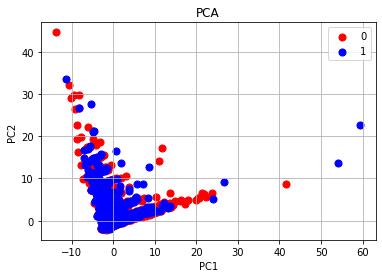

In [ ]:
ax = plt.axes()
targets = [0, 1]
colors = ['r', 'b']

# For loop to create plot
for target, color in zip(targets,colors):
    indicesToKeep = loan_data_PCA['Loan Status'] == target
    ax.scatter(loan_data_PCA.loc[indicesToKeep, 'PC1']
               , loan_data_PCA.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)

# Legend    
ax.legend(targets)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA')
ax.grid()
plt.show()

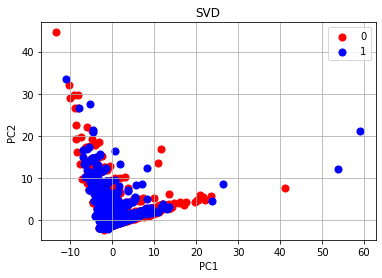

In [ ]:
ax = plt.axes()
targets = [0, 1]
colors = ['r', 'b']

# For loop to create plot
for target, color in zip(targets,colors):
    indicesToKeep = loan_data_SVD['Loan Status'] == target
    ax.scatter(loan_data_SVD.loc[indicesToKeep, 'PC1']
               , loan_data_SVD.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)

# Legend    
ax.legend(targets)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('SVD')
ax.grid()
plt.show()

# Visualization PCs with a scree plot

What is the optimum number of features to keep? In this exercise you'll create a scree plot and a cumulative explained variance ratio plot of the principal components using PCA on loan_data. This will help inform the optimal number of PCs for training a more accurate ML model going forward.

Since PCA is an unsupervised method, that means principal component analysis is performed on the X matrix having removed the target variable Loan Status from the dataset. Not setting n_components returns all the principal components from the trained model.

In [ ]:
# Remove target variable
X = loan_data.drop('Loan Status', axis=1)

# Instantiate
pca = PCA(n_components=10)

# Fit and transform
principalComponents = pca.fit_transform(X)

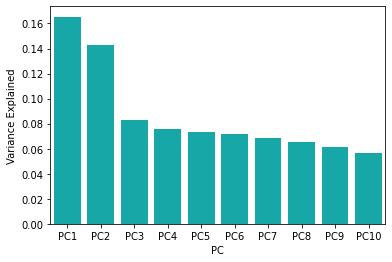

In [ ]:
# List principal components names
principal_components = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

# Create a DataFrame
pca_df = pd.DataFrame({'Variance Explained': pca.explained_variance_ratio_,
             'PC':principal_components})

# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.show()

Instantiate, fit and transform a PCA object not setting n_components. Print the variance explained ratio.

In [ ]:
# Instantiate, fit and transform
pca2 = PCA()
principalComponents2 = pca2.fit_transform(X)

# Assign variance explained
var = pca2.explained_variance_ratio_

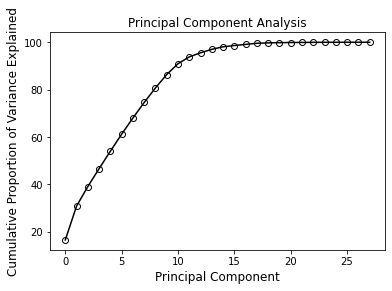

In [ ]:
# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()

In [ ]:
loan_data.shape

(88910, 29)